In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [9]:
from lib import *
ds = pd.read_csv('wine.csv')
y_train = ds['class'].to_numpy()

ds = ds.drop(columns=['class'])
X_train = ds.to_numpy()
normalize(X_train, dataset_minmax(X_train))
# pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
newX = tsne.fit_transform(X_train)

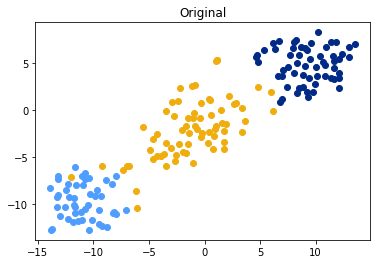

AttributeError: 'TSNE' object has no attribute 'transform'

In [11]:
centers, y_clust = fit_k_means(X_train, 3)
draw_scatter(newX, y_train, 'Original')

centers = tsne.transform(centers)
draw_scatter(newX, y_clust, 'Clustered', centers)

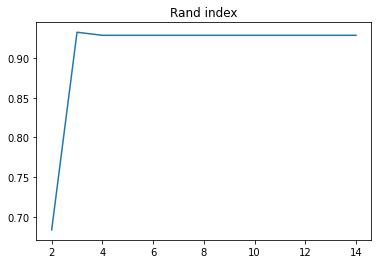

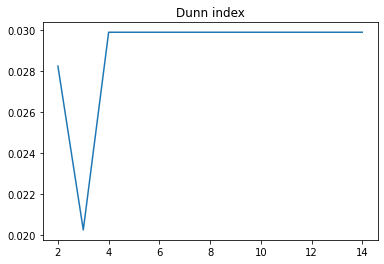

In [7]:
rand_indexes = []
dunn_indexes = []
k_s = []
for i in range(2,15):
    k_s.append(i)
    m, d = fit_k_means(X_train, i)
    rand_indexes.append(calc_Rand_index(y_train, d))
    dunn_indexes.append(calc_Dunn_index(X_train, d, i))

plt.plot(k_s, rand_indexes)
plt.title('Rand index')
plt.show()
plt.plot(k_s, dunn_indexes)
plt.title('Dunn index')
plt.show()